In [89]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [39]:
#read in file and write only the urls to output 
IN_FILE = "/shared/3/projects/benlitterer/podcastData/processed/floydMonth/floydMonthEn.csv"
df = pd.read_csv(IN_FILE, lineterminator="\n")

<ipython-input-39-6fe8a334f350>:3: DtypeWarning: Columns (6,7,8,12,20,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(IN_FILE, lineterminator="\n")


In [40]:
df = df.dropna(subset=["enclosure"])

In [92]:
def parseDurations(inDuration): 
    #if na value, just return na value 
    if inDuration != inDuration: 
        return inDuration 
    
    inDuration = str(inDuration)
    inDuration = re.sub("[A-z]", "", inDuration)
    colonCount = inDuration.count(":")
    
    try: 
        
        #parse different strings into number of seconds 
        if colonCount == 0: 
            return int(inDuration)

        elif colonCount == 1: 
            mins, seconds = [int(item) for item in inDuration.split(":")]
            return (60*mins) + seconds 

        elif colonCount == 2: 
            hours, mins, seconds = [int(item) for item in inDuration.split(":")]
            return (hours*60*60) + (mins*60) + seconds
        else: 
            return np.nan
    except: 
        return np.nan

In [79]:
#df["duration"].apply(parseDurations)
#df.dropna(subset=["duration"]).loc[df.dropna(subset=["duration"])["duration"].str.contains("mins"), "duration"]

In [93]:
df["parsedDurations"] = df["duration"].apply(parseDurations)

In [94]:
sum(df["parsedDurations"].isnull())

17718

In [100]:
df[["parsedDurations", "duration"]].sample(10)

,parsedDurations,duration
56875,155.0,00:02:35
469030,205.0,205
40419,2112.0,35:12
295725,681.0,00:11:21
449097,2592.0,2592
317689,2669.0,2669
378519,93.0,00:01:33
514877,3732.0,3732
406897,1094.0,1094
613632,3154.0,00:52:34


Text(0, 0.5, '# of podcasts')

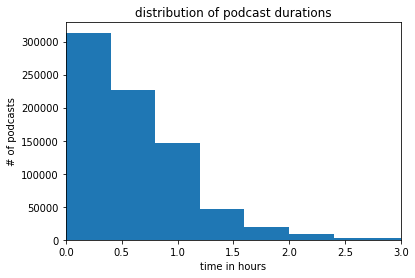

In [115]:
durations = df.dropna(subset=["parsedDurations"])
durations = durations[durations["parsedDurations"] / 60 < 240]

plt.hist(durations["parsedDurations"] / 60 / 60)
plt.xlim(0, 3)
plt.title("distribution of podcast durations")
plt.xlabel("time in hours")
plt.ylabel("# of podcasts")

In [118]:
df.columns

Index(['Unnamed: 0', 'rssUrl', 'epTitle', 'epDescription', 'duration',
       'pubDate', 'copyright', 'itunes:type', 'itunes:complete', 'guid',
       'itunes:explicit', 'enclosure', 'itunes:image', 'transDict', 'id',
       'title', 'lastUpdate', 'link', 'lastHttpStatus', 'dead', 'contentType',
       'itunesId', 'originalUrl', 'itunesAuthor', 'itunesOwnerName',
       'explicit', 'imageUrl', 'itunesType', 'generator', 'newestItemPubdate',
       'language', 'oldestItemPubdate', 'episodeCount', 'popularityScore',
       'priority', 'createdOn', 'updateFrequency', 'chash', 'host',
       'newestEnclosureUrl', 'podcastGuid', 'podDescription', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', 'category9', 'category10',
       'newestEnclosureDuration', 'oldestItemDatetime', 'cleanDates',
       'cleanDatesLoc', 'parsedDuration', 'parsedDurations'],
      dtype='object')

In [125]:
df.sort_values("parsedDurations")[["enclosure", "title","epTitle", "pubDate", "cleanDatesLoc", "cleanDates", "parsedDurations"]]
df = df.sort_values("parsedDurations")

In [132]:
df[["duration", "parsedDurations", "enclosure"]].head()

,duration,parsedDurations,enclosure
48143,0:00,0.0,https://dts.podtrac.com/redirect.mp3/dts.podtr...
683249,00:00,0.0,http://www.jonesroadchurch.org/media/uploads/s...
683248,00:00,0.0,http://www.jonesroadchurch.org/media/uploads/s...
688220,0,0.0,https://s3.castbox.fm/.static/rss/10259/271014109
43037,0:00,0.0,https://chtbl.com/track/3712E/torahcleveland.c...


In [124]:
#for some reason we have all of these numbers... 
#only a small fraction though 
len(df.loc[(df["enclosure"].str.contains("https") == False) & (df["enclosure"].str.contains("http") == False), "enclosure"])

30

In [126]:
#get only the urls 
df = df[(df["enclosure"].str.contains("https")) | (df["enclosure"].str.contains("http"))]

In [127]:
df.shape

(787223, 58)

In [128]:
outStr = "\n".join(list(df["enclosure"]))

In [130]:
OUTFILE = "/shared/3/projects/benlitterer/podcastData/mp3s/links/floydMonth/floydMonthLinks.txt" 
with open(OUTFILE, "w") as outHandle: 
    outHandle.write(outStr)